In [6]:
import numpy as np
import tensorflow as tf
from IPython.core.display_functions import display
from IPython.lib.display import Audio
from scipy.io.wavfile import read
from model import Model
import soundfile as sf
import os
import matplotlib.pyplot as plt
import librosa

In [ ]:
def basic_test():
    # Load TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path="models/models/browserfft-speech.tflite")
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Test model on random input data.
    input_shape = input_details[0]['shape']
    print(input_details)

    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(output_data)

In [ ]:
def test_on_wav():
    a = read("135c6841_nohash_0.wav")
    data = np.array(a[1], dtype=float)
    print(data.shape)
    model = Model()
    output = model.predict(data.reshape((1, -1)).astype(np.float32), 16000)
    res = np.argmax(output[0])
    print(res)

Class: 
File: 135c6841_nohash_0.wav
Sample rate: 16000
Sample length: 16000


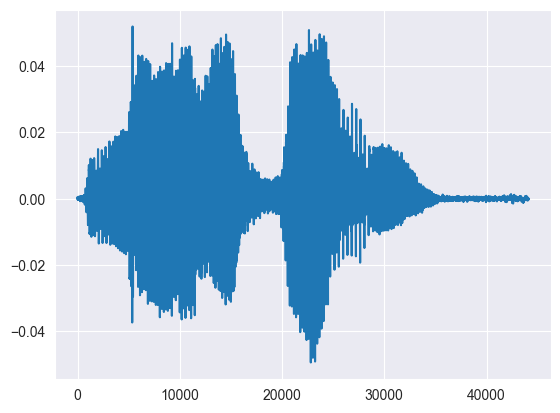

In [18]:

def show_sample(audio_path):
    data, rate = sf.read(audio_path)
    class_name = os.path.basename(os.path.dirname(audio_path))
    print(f'Class: {class_name}')
    print(f'File: {audio_path}')
    print(f'Sample rate: {rate}')
    print(f'Sample length: {len(data)}')

    if rate != 44100:
        data = librosa.resample(data, orig_sr=rate, target_sr=44100)

    if len(data) < 44032:
        data.resize(44032)

   # data = np.expand_dims(data[:44032], axis=0)

    plt.title(class_name)
    plt.plot(data)
    display(Audio(data, rate=rate))

show_sample("135c6841_nohash_0.wav")

Class: 
File: d5db6a2e-e339-48c4-b8bf-653bd1610201.wav
Sample rate: 16000
Sample length: 16000


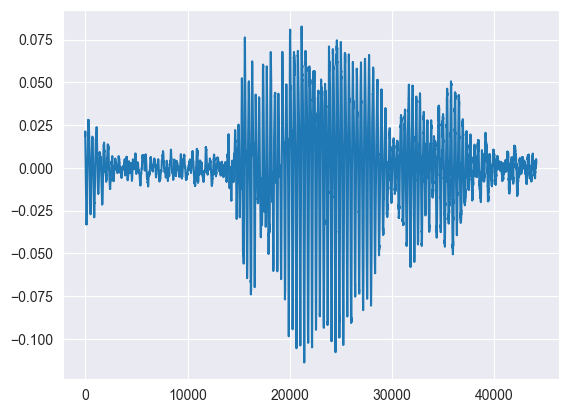

In [22]:
show_sample("d5db6a2e-e339-48c4-b8bf-653bd1610201.wav")

KeyboardInterrupt: 

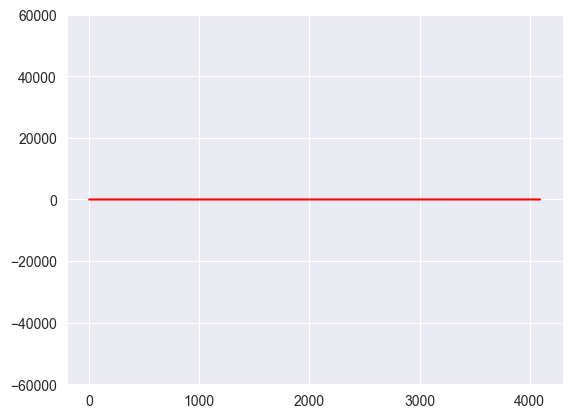

In [1]:
import numpy as np
import pyaudio as pa
import struct
import matplotlib.pyplot as plt

CHUNK = 1024 * 2
FORMAT = pa.paInt16
CHANNELS = 1
RATE = 44100 # in Hz

p = pa.PyAudio()

stream = p.open(
    format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)



fig,ax = plt.subplots()
x = np.arange(0,2*CHUNK,2)
line, = ax.plot(x, np.random.rand(CHUNK),'r')
ax.set_ylim(-60000,60000)
ax.ser_xlim = (0,CHUNK)

while 1:
    data = stream.read(CHUNK, exception_on_overflow=False)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    line.set_ydata(dataInt)
    fig.canvas.draw()
    fig.canvas.flush_events()
